#Import Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Import Dataset

In [ ]:
#Tampilkan Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/KP/Data Balita Puskesmas Depok 3 Sleman.xlsx')
df

Mounted at /content/drive


,JK,Umur,BB,TB,LILA,BB/U,ZS BB/U,TB/U,ZS TB/U,ZS BB/TB,Status Gizi
0,P,60 Bulan,18.35,108.3,11.5,Normal,0.05,Normal,-0.24,0.23,Gizi Baik
1,P,57 Bulan,16.50,105.0,18.0,Normal,-0.45,Normal,-0.56,-0.18,Gizi Baik
2,P,56 Bulan,14.60,101.8,16.5,Normal,-1.32,Normal,-1.23,-0.85,Gizi Baik
3,P,56 Bulan,13.75,101.0,14.5,Normal,-1.75,Normal,-1.37,-1.36,Gizi Baik
4,P,55 Bulan,18.20,108.6,17.5,Normal,0.31,Normal,0.37,0.08,Gizi Baik
...,...,...,...,...,...,...,...,...,...,...,...
194,P,52 Bulan,13.20,103.0,14.5,Kurang,-2.28,Normal,-0.27,-3.38,Gizi Buruk
195,L,59 Bulan,13.20,98.0,15.0,Kurang,-2.10,Normal,-0.22,-3.36,Gizi Buruk
196,L,60 Bulan,13.20,94.0,17.0,Kurang,-2.28,Normal,-0.27,-3.34,Gizi Buruk
197,P,58 Bulan,13.20,80.0,16.0,Kurang,-2.30,Normal,-0.25,-3.32,Gizi Buruk


#Exploratory Data Analysis (EDA)

##Informasi Dataset

In [ ]:
df.info() # Melihat Informasi Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   JK           199 non-null    object 
 1   Umur         199 non-null    object 
 2   BB           199 non-null    float64
 3   TB           199 non-null    float64
 4   LILA         199 non-null    float64
 5   BB/U         199 non-null    object 
 6   ZS BB/U      199 non-null    float64
 7   TB/U         199 non-null    object 
 8   ZS TB/U      199 non-null    float64
 9   ZS BB/TB     199 non-null    float64
 10  Status Gizi  199 non-null    object 
dtypes: float64(6), object(5)
memory usage: 17.2+ KB


##Statistik Deskriptif

In [ ]:
df.describe() # Statistik deskriptif data

,BB,TB,LILA,ZS BB/U,ZS TB/U,ZS BB/TB
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.616935,96.004523,15.552764,-0.638945,-0.969749,-0.158342
std,3.883326,8.674433,3.609259,1.595195,1.212103,1.709584
min,8.300000,76.500000,0.000000,-4.450000,-4.250000,-3.700000
25%,11.945000,90.000000,14.500000,-1.740000,-1.800000,-1.140000
50%,14.000000,96.000000,16.000000,-1.020000,-1.020000,-0.350000
75%,16.450000,102.250000,17.000000,0.285000,-0.245000,0.915000
max,26.900000,118.000000,23.500000,4.120000,2.700000,4.980000


##Missing Values

In [ ]:
# Mengecek missing values
print("Missing values:")
print(df.isnull().sum())

# Mengecek nilai 0
print("\nZero values:")
print((df == 0).sum())

Missing values:
JK             0
Umur           0
BB             0
TB             0
LILA           0
BB/U           0
ZS BB/U        0
TB/U           0
ZS TB/U        0
ZS BB/TB       0
Status Gizi    0
dtype: int64

Zero values:
JK             0
Umur           0
BB             0
TB             0
LILA           7
BB/U           0
ZS BB/U        0
TB/U           0
ZS TB/U        0
ZS BB/TB       1
Status Gizi    0
dtype: int64


##Kelas Target

In [ ]:
df['Status Gizi'].value_counts() # Target (Status Gizi)

,count
Status Gizi,
Gizi Baik,124
Risiko Gizi Lebih,28
Gizi Kurang,17
Gizi Lebih,10
Gizi Buruk,10
Obesitas,10


#Preprocessing Data

##Imputasi

In [ ]:
# Simple Imputer
from sklearn.impute import SimpleImputer
df_imputed= df.copy()

# Pisahkan kolom numerik dan kategorikal
num_cols = df_imputed.select_dtypes(include=[np.number]).columns
cat_cols = df_imputed.select_dtypes(exclude=[np.number]).columns

# Imputasi nilai hilang untuk kolom numerik dengan median
df_imputed[num_cols] = SimpleImputer(strategy='median').fit_transform(df_imputed[num_cols])

# Imputasi nilai hilang untuk kolom kategorikal dengan modus
df_imputed[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df_imputed[cat_cols])

# Tampilkan jumlah null setelah imputasi
print("Null Setelah Imputasi:\n", df_imputed.isnull().sum())

Null Setelah Imputasi:
 JK             0
Umur           0
BB             0
TB             0
LILA           0
BB/U           0
ZS BB/U        0
TB/U           0
ZS TB/U        0
ZS BB/TB       0
Status Gizi    0
dtype: int64


##Encoding

In [ ]:
# Encoding
df_encoded = df_imputed.copy()

# Encoding kolom Umur, JK, BB/U, TB/U, Status Gizi
df_encoded['Umur'] = df_encoded['Umur'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')
df_encoded['JK'] = df_encoded['JK'].astype(str).str.strip().map({'P': 0, 'L': 1})
df_encoded['BB/U'] = df_encoded['BB/U'].astype(str).str.strip().map({'Sangat Kurang': 0, 'Kurang': 1, 'Normal': 2, 'Risiko Lebih': 3})
df_encoded['TB/U'] = df_encoded['TB/U'].astype(str).str.strip().map({'Sangat Pendek': 0, 'Pendek': 1, 'Normal': 2})
df_encoded['Status Gizi'] = df_encoded['Status Gizi'].astype(str).str.strip().map({'Gizi Buruk': 0, 'Gizi Kurang': 1, 'Gizi Baik': 2, 'Risiko Gizi Lebih': 3, 'Gizi Lebih': 4, 'Obesitas': 5})

print (df_encoded)

     JK  Umur     BB     TB  LILA  BB/U  ZS BB/U  TB/U  ZS TB/U  ZS BB/TB  \
0     0    60  18.35  108.3  11.5     2     0.05     2    -0.24      0.23   
1     0    57  16.50  105.0  18.0     2    -0.45     2    -0.56     -0.18   
2     0    56  14.60  101.8  16.5     2    -1.32     2    -1.23     -0.85   
3     0    56  13.75  101.0  14.5     2    -1.75     2    -1.37     -1.36   
4     0    55  18.20  108.6  17.5     2     0.31     2     0.37      0.08   
..   ..   ...    ...    ...   ...   ...      ...   ...      ...       ...   
194   0    52  13.20  103.0  14.5     1    -2.28     2    -0.27     -3.38   
195   1    59  13.20   98.0  15.0     1    -2.10     2    -0.22     -3.36   
196   1    60  13.20   94.0  17.0     1    -2.28     2    -0.27     -3.34   
197   0    58  13.20   80.0  16.0     1    -2.30     2    -0.25     -3.32   
198   0    60  13.20  108.0  15.0     1    -2.26     2    -0.23     -3.37   

     Status Gizi  
0              2  
1              2  
2              2  

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-110167687.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_encoded['Umur'] = df_encoded['Umur'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')


##Normalisasi

In [ ]:
# Normalisasi MinMax
from sklearn.preprocessing import MinMaxScaler
df_normalized = df_encoded.copy()

# Pisahkan fitur input dan target
fitur_input = df_normalized.drop(columns=['Status Gizi'])

# MinMaxScaler
scaler = MinMaxScaler()
fitur_input_scaled = scaler.fit_transform(fitur_input)

# Gabungkan kembali dengan target
df_normalized = pd.DataFrame(fitur_input_scaled, columns=fitur_input.columns)
df_normalized['Status Gizi'] = df_encoded['Status Gizi'].values

print(df_normalized)

      JK      Umur        BB        TB      LILA      BB/U   ZS BB/U  TB/U  \
0    0.0  1.000000  0.540323  0.766265  0.489362  0.666667  0.525088   1.0   
1    0.0  0.923077  0.440860  0.686747  0.765957  0.666667  0.466744   1.0   
2    0.0  0.897436  0.338710  0.609639  0.702128  0.666667  0.365228   1.0   
3    0.0  0.897436  0.293011  0.590361  0.617021  0.666667  0.315053   1.0   
4    0.0  0.871795  0.532258  0.773494  0.744681  0.666667  0.555426   1.0   
..   ...       ...       ...       ...       ...       ...       ...   ...   
194  0.0  0.794872  0.263441  0.638554  0.617021  0.333333  0.253209   1.0   
195  1.0  0.974359  0.263441  0.518072  0.638298  0.333333  0.274212   1.0   
196  1.0  1.000000  0.263441  0.421687  0.723404  0.333333  0.253209   1.0   
197  0.0  0.948718  0.263441  0.084337  0.680851  0.333333  0.250875   1.0   
198  0.0  1.000000  0.263441  0.759036  0.638298  0.333333  0.255543   1.0   

      ZS TB/U  ZS BB/TB  Status Gizi  
0    0.576978  0.452765 

#Oversampling

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df_normalized.drop('Status Gizi', axis=1)
y = df_normalized['Status Gizi']

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Distribusi kelas sebelum SMOTE:")
print(y.value_counts())
print("\nDistribusi kelas setelah SMOTE:")
print(y_resampled.value_counts())

Distribusi kelas sebelum SMOTE:
Status Gizi
2    124
3     28
1     17
4     10
0     10
5     10
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Status Gizi
2    124
3    124
4    124
1    124
0    124
5    124
Name: count, dtype: int64


#Split Data

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
print('X_train shape:', X_train.shape)
print('X_test shape :', X_test.shape)

X_train shape: (520, 10)
X_test shape : (224, 10)


# Feature Selection

In [ ]:
# Feature Selection
from sklearn.feature_selection import chi2
import pandas as pd

# Uji Chi-Square
chi2_scores, p_values = chi2(X_train, y_train)

# Buat DataFrame hasil
chi2_results = pd.DataFrame({'Features': X_train.columns, 'Chi2 Score': chi2_scores, 'P-Value': p_values}).sort_values(by='Chi2 Score', ascending=False)

print("Hasil Feature Selection menggunakan Chi-Squared:")
print(chi2_results)

# Pilih fitur dengan P-Value < 0.05
selected_features = chi2_results[chi2_results['P-Value'] < 0.05]['Features'].tolist()

# Cetak hasil
print(f"\nFitur Terpilih sebanyak {len(selected_features)} fitur:")
print(selected_features)

# Ambil subset fitur
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Hasil Feature Selection menggunakan Chi-Squared:
   Features  Chi2 Score       P-Value
9  ZS BB/TB  102.240948  1.780722e-20
2        BB   76.472629  4.583325e-15
5      BB/U   65.490328  8.867043e-13
6   ZS BB/U   63.169216  2.685428e-12
0        JK   37.402489  4.973589e-07
3        TB   14.186243  1.446867e-02
8   ZS TB/U   14.171403  1.455653e-02
1      Umur   12.436368  2.927384e-02
4      LILA   10.186218  7.012754e-02
7      TB/U    7.322512  1.977382e-01

Fitur Terpilih sebanyak 8 fitur:
['ZS BB/TB', 'BB', 'BB/U', 'ZS BB/U', 'JK', 'TB', 'ZS TB/U', 'Umur']


#Tuning Parameter

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini'], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [10, 15, 20, 30], 'min_samples_leaf': [5, 10, 15, 20], 'max_features': ['sqrt', 'log2'], 'class_weight': ['balanced'], 'ccp_alpha': [0.01, 0.02, 0.05, 0.1]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_ * 100:.2f}%")

Best Parameters: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10}
Best CV Accuracy: 94.42%


# Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, class_weight='balanced', criterion='gini', max_depth=7, max_features='sqrt', min_samples_leaf=5, min_samples_split=10, ccp_alpha=0.01)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=7,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

# Metrik Evaluasi

In [ ]:
# Metrik Evaluasi Data Training
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_train = model.predict(X_train)

# Classification Report
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

# Hitung metrik
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')

# Cetak metrik
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.95      1.00      0.97        87
           2       0.99      0.85      0.91        87
           3       0.92      0.91      0.91        86
           4       0.80      1.00      0.89        86
           5       1.00      0.84      0.91        87

    accuracy                           0.93       520
   macro avg       0.94      0.93      0.93       520
weighted avg       0.94      0.93      0.93       520

Accuracy: 93.27%
Precision: 94.10%
Recall: 93.28%
F1 Score: 93.28%


In [ ]:
# Metrik Evaluasi Data Test
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Hitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Cetak metrik
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.88      1.00      0.94        37
           2       0.84      0.73      0.78        37
           3       0.86      0.79      0.82        38
           4       0.79      1.00      0.88        38
           5       1.00      0.81      0.90        37

    accuracy                           0.89       224
   macro avg       0.90      0.89      0.89       224
weighted avg       0.89      0.89      0.89       224

Accuracy: 88.84%
Precision: 89.56%
Recall: 88.83%
F1 Score: 88.67%


# Confusion Matrix

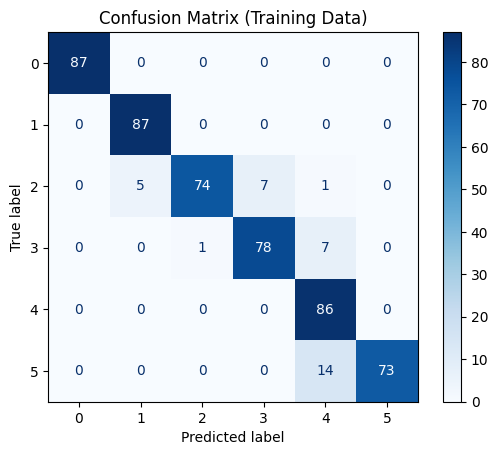

In [ ]:
# Confusion Matrix (Training Data)
cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
cmd_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
cmd_train.plot(cmap='Blues')
plt.title("Confusion Matrix (Training Data)")
plt.show()

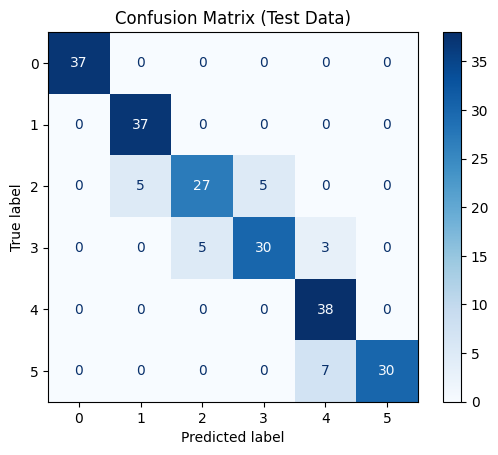

In [ ]:
# Confusion Matrix (Test Data)
cm_test = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
cmd_test.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.show()